# Symbolic Regression and the Island Model

In this tutorial we will learn how to evolve multiple Cartesian Genetic Programs in an island model setup. We use the same problem used in a previous tutorial performing the same evolution in a *pygmo* archipelago (that is in an island model where each island maintains a population of solutions and evolves them)

In [1]:
# Some necessary imports.
import dcgpy
import pygmo as pg
import numpy as np
# Sympy is nice to have for basic symbolic manipulation.
from sympy import init_printing
from sympy.parsing.sympy_parser import *
init_printing()
# Fundamental for plotting.
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Here we define our problem and solution strategy. In this case a simple Evolutionary Strategy acting on 
# a CGP with no added constants.
X, Y = dcgpy.generate_chwirut2()
ss = dcgpy.kernel_set_double(["sum", "diff", "mul", "pdiv"])
udp = dcgpy.symbolic_regression(points = X, labels = Y, kernels=ss())
uda  = dcgpy.es4cgp(gen = 10000, max_mut = 2)

In [5]:
# We then construct our archipelago of *n*=64 islands containin 4 indivisuals each.
prob = pg.problem(udp)
algo = pg.algorithm(uda)
archi = pg.archipelago(algo = algo, prob = prob, pop_size = 4, n=64)

In [6]:
# Here is where the evolution starts
archi.evolve()

In [7]:
# We can inspect at any time the status of any island of the archipelago
archi[23]

Island name: Multiprocessing island
	C++ class name: pybind11::object

	Status: busy

Extra info:
	Using a process pool: yes
	Number of processes in the pool: 4

Algorithm: ES for CGP: Evolutionary strategy for Cartesian Genetic Programming

Problem: a CGP symbolic regression problem

Replacement policy: Fair replace

Selection policy: Select best

Population size: 4
	Champion decision vector: [3, 0, 0, 0, 1, ... ]
	Champion fitness: [1673.5]

In [8]:
# Note how in the log above the island is *busy* indicating that the evolution is running. Note also that the
# island is, in this case, of type *thread island* indicating that its evolution is running on a separate thread
# We can also stop the interactive session and wait for the evolution to finish
archi.wait_check()

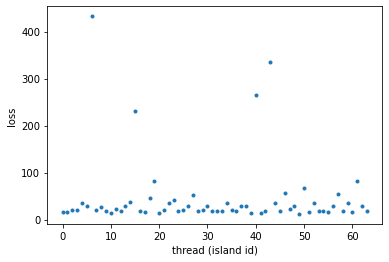

In [9]:
# Let us inspect the results
fs = archi.get_champions_f()
xs = archi.get_champions_x()
plt.plot(fs, '.')
plt.xlabel('thread (island id)')
_ = plt.ylabel('loss')

In [10]:
b_idx = np.argmin(fs)
best_x = archi.get_champions_x()[b_idx]

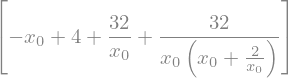

In [11]:
parse_expr(udp.prettier(best_x))

In [12]:
# And lets see what our model actually predicts on the inputs
Y_pred = udp.predict(X, best_x)

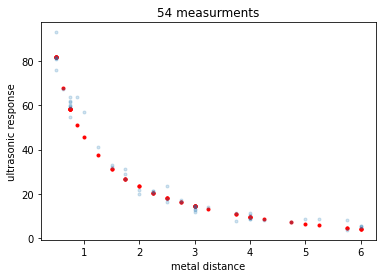

In [13]:
# Lets comapre to the data
_ = plt.plot(X, Y_pred, 'r.')
_ = plt.plot(X, Y, '.', alpha=0.2)
_ = plt.title('54 measurments')
_ = plt.xlabel('metal distance')
_ = plt.ylabel('ultrasonic response')